C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11852\586258090.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='USD_CAP', y='LOCATION', palette='viridis')


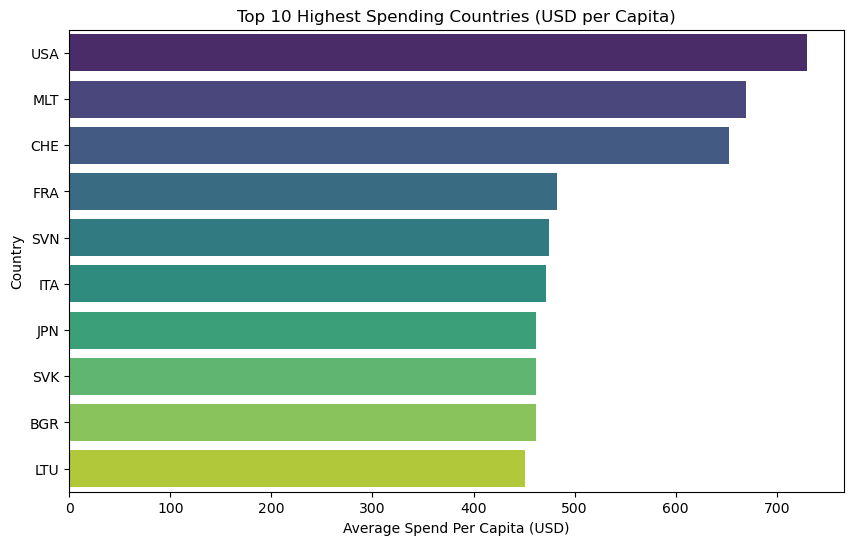

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11852\586258090.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, x='USD_CAP', y='LOCATION', palette='magma')


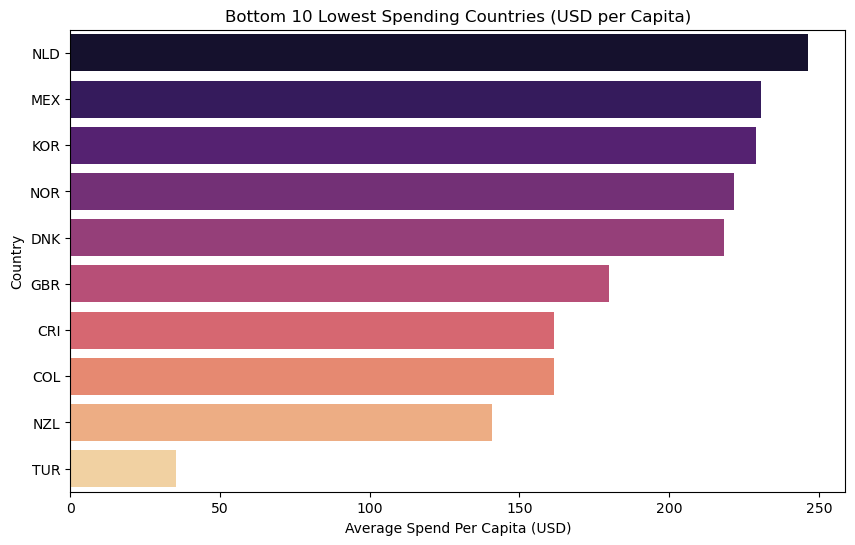

Intercept: -24.71452145800521
Coefficient: 295.8200311469281


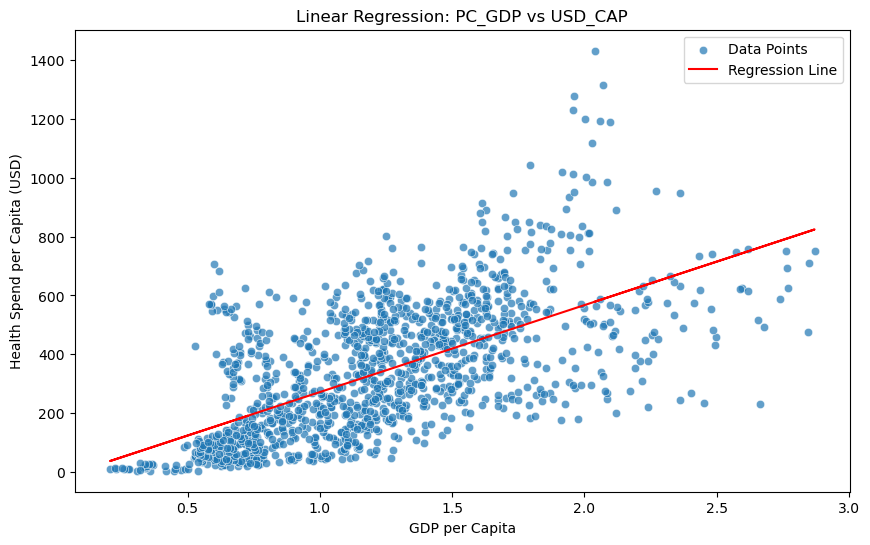

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"C:\workspaceRezaDSI\Team-2-Cohort-5\data\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Calculate Average Spend Per Capita by Location
avg_spend = data.groupby('LOCATION')['USD_CAP'].mean().reset_index()
avg_spend = avg_spend.sort_values(by='USD_CAP', ascending=False)

# Top 10 and Bottom 10 Countries
top_10 = avg_spend.head(10)
bottom_10 = avg_spend.tail(10)

# Bar Chart for Top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='USD_CAP', y='LOCATION', palette='viridis')
plt.title('Top 10 Highest Spending Countries (USD per Capita)')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()

# Bar Chart for Bottom 10
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10, x='USD_CAP', y='LOCATION', palette='magma')
plt.title('Bottom 10 Lowest Spending Countries (USD per Capita)')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()

# Example: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare Data
X = data[['PC_GDP']].dropna()  # Predictor
y = data['USD_CAP'].dropna()  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['PC_GDP'], y=y, alpha=0.7, label='Data Points')
plt.plot(X['PC_GDP'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: PC_GDP vs USD_CAP')
plt.xlabel('GDP per Capita')
plt.ylabel('Health Spend per Capita (USD)')
plt.legend()
plt.show()


To rank countries for the first and last 10 years of our dataset and handle outliers logically, here’s an outline of the steps along with relevant Python code:
    Steps:
Filter Data:
Divide the dataset into the first 10 years and the last 10 years based on the TIME column.

Compute Average Spending:
For each country, calculate the average per capita spending (USD_CAP) for the respective periods.

Rank Countries:
Sort the countries by average spending in ascending and descending order to identify the Top 10 and Bottom 10 for both periods.

Handle Outliers:
Use statistical measures like the interquartile range (IQR) to detect outliers.

Replace or cap extreme values if they are found to distort the rankings.

Visualize Results:
Create bar charts for better insights into the ranked countries.

In [4]:
from scipy.stats import zscore

# Compute Z-scores
data['Z_Score'] = zscore(data['USD_CAP'])  # Replace 'USD_CAP' with your desired column
outliers = data[(data['Z_Score'] > 3) | (data['Z_Score'] < -3)]
print(outliers)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND   Z_Score
335       DEU  2021       13.866   1.793  1042.460     86728.58  3.114828
1332      USA  2013       11.975   1.915  1020.541    322552.13  3.017873
1333      USA  2014       12.527   2.029  1118.634    356157.77  3.451771
1334      USA  2015       12.707   2.095  1189.437    381498.83  3.764956
1335      USA  2016       12.263   2.060  1192.301    385198.78  3.777624
1336      USA  2017       11.954   2.004  1200.769    390396.57  3.815081
1337      USA  2018       11.766   1.957  1229.266    401771.09  3.941133
1338      USA  2019       11.767   1.961  1277.032    419287.86  4.152418
1339      USA  2020       11.037   2.070  1315.218    436030.19  4.321327
1340      USA  2021       11.743   2.039  1432.309    475596.74  4.839259


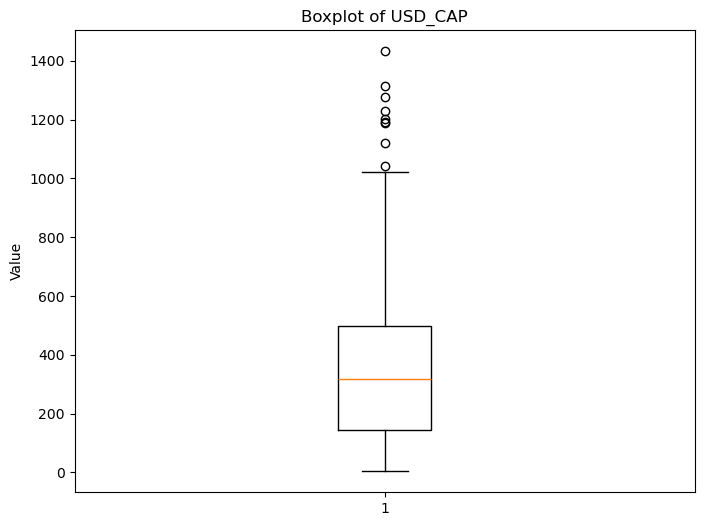

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(data['USD_CAP'])  # Replace 'USD_CAP' with your column
plt.title('Boxplot of USD_CAP')
plt.ylabel('Value')
plt.show()


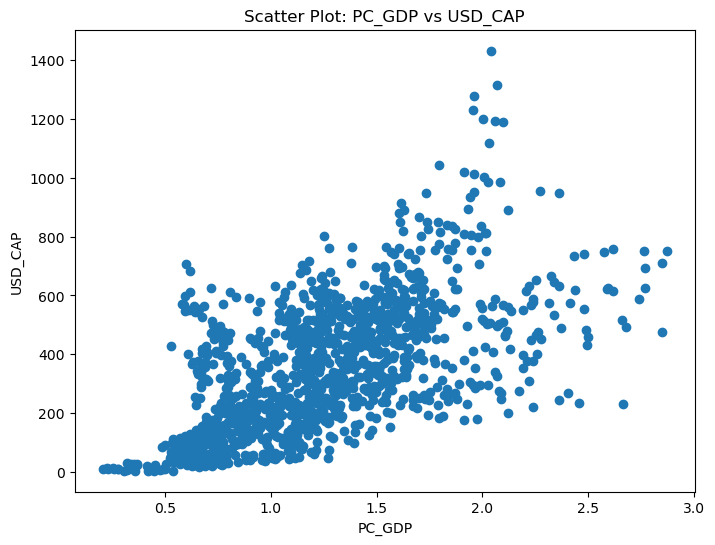

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data['PC_GDP'], data['USD_CAP'])
plt.title('Scatter Plot: PC_GDP vs USD_CAP')
plt.xlabel('PC_GDP')
plt.ylabel('USD_CAP')
plt.show()


In [8]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
model = IsolationForest(contamination=0.05)  # 5% of data as outliers
data['Anomaly'] = model.fit_predict(data[['USD_CAP', 'PC_GDP']])  # Include relevant columns
outliers = data[data['Anomaly'] == -1]
print(outliers)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND   Z_Score  \
129       BGR  2003       37.000   2.664   231.652      1801.17 -0.471644   
130       BGR  2004       35.617   2.454   233.474      1801.69 -0.463585   
131       BGR  2005       34.274   2.362   243.791      1867.19 -0.417949   
132       BGR  2006       36.808   2.402   267.287      2031.65 -0.314018   
135       BGR  2012       37.745   2.846   474.182      3464.32  0.601147   
...       ...   ...          ...     ...       ...          ...       ...   
1336      USA  2017       11.954   2.004  1200.769    390396.57  3.815081   
1337      USA  2018       11.766   1.957  1229.266    401771.09  3.941133   
1338      USA  2019       11.767   1.961  1277.032    419287.86  4.152418   
1339      USA  2020       11.037   2.070  1315.218    436030.19  4.321327   
1340      USA  2021       11.743   2.039  1432.309    475596.74  4.839259   

      Anomaly  
129        -1  
130        -1  
131        -1  
132        

Outliers detected:
     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND
335       DEU  2021       13.866   1.793  1042.460     86728.58
1333      USA  2014       12.527   2.029  1118.634    356157.77
1334      USA  2015       12.707   2.095  1189.437    381498.83
1335      USA  2016       12.263   2.060  1192.301    385198.78
1336      USA  2017       11.954   2.004  1200.769    390396.57
1337      USA  2018       11.766   1.957  1229.266    401771.09
1338      USA  2019       11.767   1.961  1277.032    419287.86
1339      USA  2020       11.037   2.070  1315.218    436030.19
1340      USA  2021       11.743   2.039  1432.309    475596.74


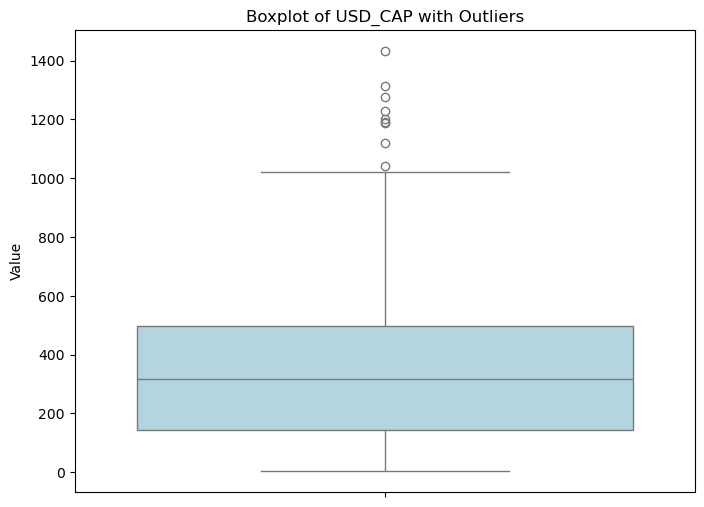

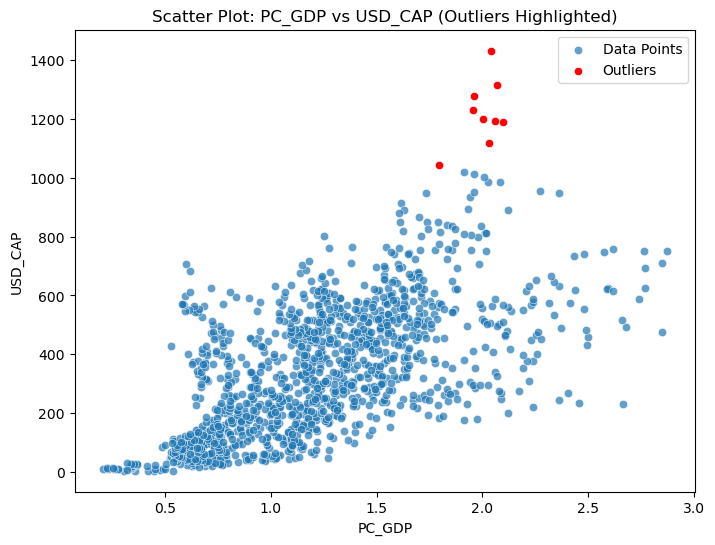

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = r"C:\workspaceRezaDSI\Team-2-Cohort-5\data\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Detect Outliers Using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify Outliers
outliers = detect_outliers_iqr(data, 'USD_CAP')  # Replace 'USD_CAP' with your desired column
print("Outliers detected:")
print(outliers)

# Visualization - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='USD_CAP', color='lightblue')
plt.title('Boxplot of USD_CAP with Outliers')
plt.ylabel('Value')
plt.show()

# Visualization - Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PC_GDP'], y=data['USD_CAP'], label='Data Points', alpha=0.7)
sns.scatterplot(x=outliers['PC_GDP'], y=outliers['USD_CAP'], color='red', label='Outliers')
plt.title('Scatter Plot: PC_GDP vs USD_CAP (Outliers Highlighted)')
plt.xlabel('PC_GDP')
plt.ylabel('USD_CAP')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import plotly.express as px

# Load dataset
file_path = r"C:\workspaceRezaDSI\Team-2-Cohort-5\data\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Aggregate latest data for each country
latest_data = data.groupby("LOCATION").last().reset_index()

# Create an interactive choropleth map
fig = px.choropleth(
    latest_data,
    locations="LOCATION",  # ISO Alpha-3 country codes
    locationmode="ISO-3",
    color="PC_HEALTHXP",
    hover_name="LOCATION",
    title="Healthcare Expenditure per Capita (Latest Year)",
    color_continuous_scale="Viridis"
)
fig.show()